In [24]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [25]:
#データを分割する
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [26]:
#CNNをつかうためのおまじないをする
#今回はグレースケールイメージである1を設定
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [12]:
train_X.shape

(60000, 28, 28, 1)

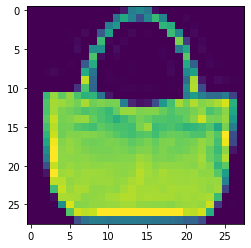

In [34]:
#trainの画像をみてみる
img_index = 100 #⇒これに関してはindexを変えることで別の画像を表示させることができる
img = train_X[img_index]
plt.imshow(img)

In [13]:
#モデルが学習する速度が向上するためのおまじないをする
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [14]:
#0～9までの数字にカテゴライズする
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [15]:
#CNNのモデルを作成しトレーニングをする
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
#デスクトップのGPU的に10エポックに留めて学習させる
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 77s 83ms/step - loss: 0.4605 - accuracy: 0.8314
Epoch 2/10
938/938 [==============================] - 82s 87ms/step - loss: 0.3155 - accuracy: 0.8855
Epoch 3/10
938/938 [==============================] - 84s 90ms/step - loss: 0.2764 - accuracy: 0.89911s
Epoch 4/10
938/938 [==============================] - 80s 86ms/step - loss: 0.2495 - accuracy: 0.9095
Epoch 5/10
938/938 [==============================] - 80s 85ms/step - loss: 0.2321 - accuracy: 0.9152
Epoch 6/10
938/938 [==============================] - 88s 94ms/step - loss: 0.2131 - accuracy: 0.9228
Epoch 7/10
938/938 [==============================] - 87s 93ms/step - loss: 0.1986 - accuracy: 0.9256
Epoch 8/10
938/938 [==============================] - 72s 77ms/step - loss: 0.1852 - accuracy: 0.9325
Epoch 9/10
938/938 [==============================] - 78s 83ms/step - loss: 0.1731 - accuracy: 0.9363
Epoch 10/10
938/938 [==============================] - 71s 76ms/step - loss: 0.1

In [20]:
#モデルを評価する
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.3152 - accuracy: 0.9022
Test loss 0.3151668906211853
Test accuracy 0.9021999835968018


In [21]:
#＜＜予測結果を出力＞＞
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

9


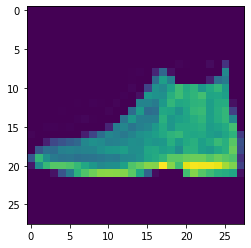

In [33]:
#＜＜実際の結果を出力＞＞
# 0 = Tシャツ/トップ
# 1 =パンツ
# 2 =プルオーバー
# 3 =ドレス
# 4 =コート
# 5 =サンダル
# 6 =シャツ
# 7 =スニーカー
# 8 =バッグ
# 9 =ショートブーツ
plt.imshow(test_X[0].reshape(28, 28))
plt.show()